importing datasets


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing libraries


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# DATA PREPROCESING

In [3]:
 training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project_database/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


## validation image preprocessing


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project_database/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


## BUILDING MODEL

In [5]:
cnn = tf.keras.models.Sequential()

# BUILDING CONOLUTIONAL LAYER

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
#cnn.add(tf.keras.layers.Dropout(0.25)) #to avoid overfitting

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:

cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
# output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# compiling and training phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.0256 - loss: 14.4016 - val_accuracy: 0.0285 - val_loss: 3.5819
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.0378 - loss: 3.5787 - val_accuracy: 0.0342 - val_loss: 3.5712
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.0429 - loss: 3.5714 - val_accuracy: 0.0484 - val_loss: 3.5412
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.0371 - loss: 3.5533 - val_accuracy: 0.0855 - val_loss: 3.4923
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.0583 - loss: 3.5090 - val_accuracy: 0.0769 - val_loss: 3.4889
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.0618 - loss: 3.4956 - val_accuracy: 0.1453 - val_loss: 3.1355
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.0795 - loss: 3.3116 - val_accuracy: 0.2194 - val_loss: 2.8929
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.1348 - loss: 3.0822 - val_accuracy: 0.3305 - 

evaluating model


In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 845ms/step - accuracy: 0.9283 - loss: 0.2617
Training accuracy: 0.9274478554725647


In [18]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9233 - loss: 0.4489
Validation accuracy: 0.9287749528884888


saving model


In [19]:
cnn.save('trained_model.h5')

In [20]:
training_history.history #Return Dictionary of history

{'accuracy': [0.022792937234044075,
  0.03402889147400856,
  0.03820224851369858,
  0.041091494262218475,
  0.05393258482217789,
  0.06998395174741745,
  0.09341894090175629,
  0.1486356407403946,
  0.21476726233959198,
  0.2770465612411499,
  0.32712680101394653,
  0.3919743299484253,
  0.42375603318214417,
  0.48796147108078003,
  0.5142857432365417,
  0.5232744812965393,
  0.5768860578536987,
  0.6138041615486145,
  0.6182985305786133,
  0.6452648639678955,
  0.6693419218063354,
  0.6963081955909729,
  0.7197431921958923,
  0.7357945442199707,
  0.7653290629386902,
  0.7939004898071289,
  0.8086677193641663,
  0.8311396241188049,
  0.8590690493583679,
  0.8619582653045654,
  0.8693419098854065,
  0.8654895424842834],
 'loss': [6.266534805297852,
  3.5775744915008545,
  3.5688259601593018,
  3.5494887828826904,
  3.515571355819702,
  3.4436957836151123,
  3.256270408630371,
  3.03183650970459,
  2.8538053035736084,
  2.575896978378296,
  2.389846086502075,
  2.1527719497680664,
  2.0

In [21]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# calculating Accuracy of Model Achieved On Validation Set

In [23]:

print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.87749528884888 %


# Accuracy Visualization

# training visualization

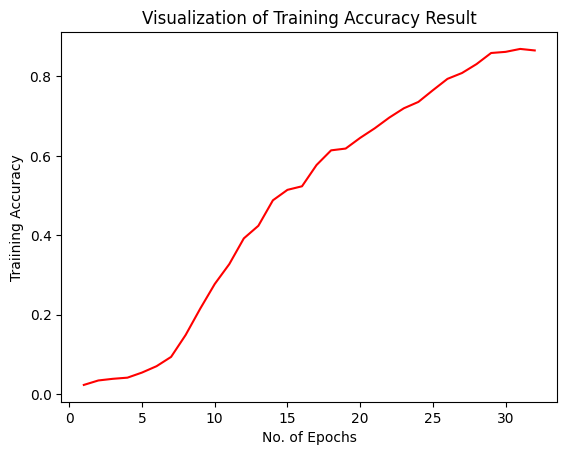

In [24]:

epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#validation Accuracy

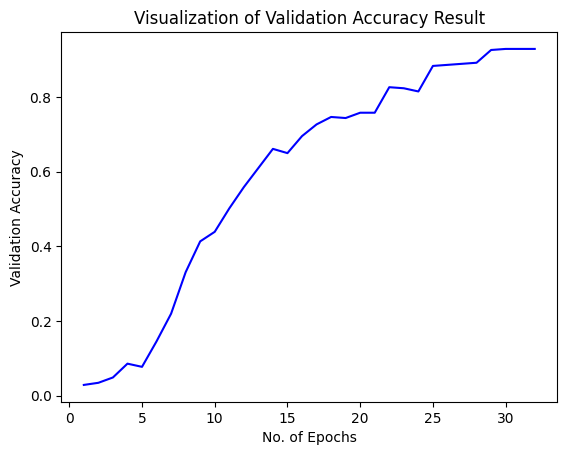

In [25]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# training and validation set evaluation

In [26]:
training_loss,training_accuracy=cnn.evaluate(training_set)

98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 833ms/step - accuracy: 0.9284 - loss: 0.2673


In [27]:
validation_loss,validation_accuracy=cnn.evaluate(validation_set)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 980ms/step - accuracy: 0.9089 - loss: 0.4370


In [28]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

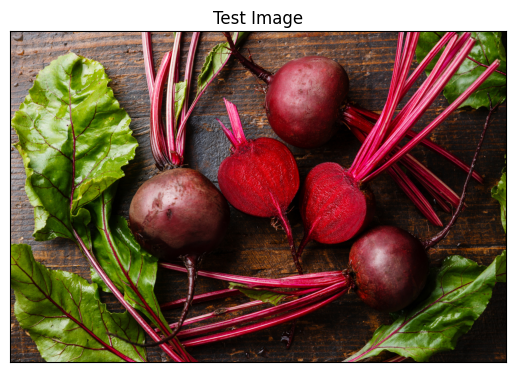

In [42]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/project_database/test/beetroot/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [43]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [44]:
print(predictions[0])
print(max(predictions[0]))

[2.7386792e-17 2.8602643e-24 1.0000000e+00 1.2265917e-14 3.6233390e-29
 2.5440704e-15 1.8610882e-17 6.9693482e-28 1.5395352e-11 1.2392518e-23
 4.0418617e-23 2.2448285e-13 8.9669589e-22 8.2895303e-24 2.7897483e-15
 1.9446545e-16 6.8262704e-26 1.0281252e-22 1.9102164e-23 5.7909951e-18
 1.8761367e-16 1.8061351e-17 6.5838780e-16 9.5364332e-22 2.1926686e-35
 2.9851167e-16 4.6796724e-15 1.0759536e-16 5.5796373e-15 4.8667482e-19
 6.4058270e-23 1.2993435e-24 2.4371345e-12 4.8837435e-20 5.3118717e-16
 5.9508072e-16]
1.0


In [45]:

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project_database/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


#test set evaluation


In [46]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9220 - loss: 0.4574
Test accuracy: 0.9275766015052795


In [47]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [48]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0])

[2]


<function matplotlib.pyplot.show(close=None, block=None)>

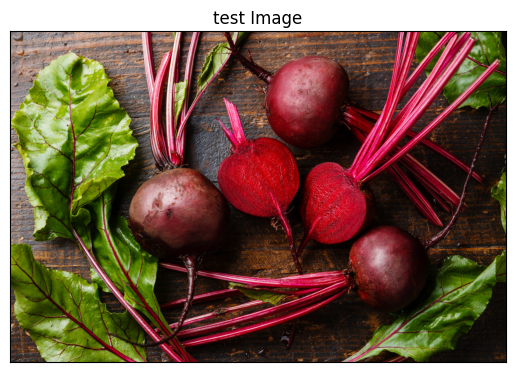

In [49]:
#display image
plt.imshow(img)
plt.title("test Image")
plt.xticks([])
plt.yticks([])
plt.show

In [50]:
#single prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a beetroot


In [51]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [52]:
file = open("labels.txt","w")
for i in test_set.class_names:
  file.write(i+"\n")
file.close()

In [53]:
with open("labels.txt") as f:
  content = f.readlines()

In [54]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']